<a href="https://colab.research.google.com/github/DataScienceUB/DeepLearningMaster2019/blob/master/14.%20Uncertainty_and_Probabilistic_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning, uncertainty and probabilistic models.


> **Certainty** is perfect knowledge that has total security from error, or the mental state of being without doubt. (*Wikipedia*)

> **Uncertainty** has been called *an unintelligible expression without a straightforward description*. It describes a situation involving insecurity and/or unknown information. It applies to predictions of future events, to physical measurements that are already made, or to the unknown. (*Wikipedia*)

A common understanding of the term **uncertainty** in scientific works is that of a measure that reflects the amount of dispersion of a random variable. In other words, it is a scalar measure of how "random" a random variable is. But this a reduction of the term.  There is **no single formula for uncertainty** because there are many different ways to measure dispersion: standard deviation, variance, and entropy are all appropriate measures. However, it's important to keep in mind that a single scalar number cannot paint a full picture of "randomness'', as that would require communicating the entire random variable itself!  *Eric Jang*.

Regarding uncertainty, we can be in several **states**:

+ Complete certainty. This is the case of macroscopic mechanics, where given an input there is no uncertainty about the output.
+ Uncertainty with risk. This is the case of a game with an uncertain output, but where we exactly know the probability distribution over outcomes.
+ Fully reducible uncertainty. This is the case of a game where by gathering sufficient data and/or using the right model we can get complete certainty.
+ Partially reducible uncertainty. This is the case of games where we have no full knowledge about the probability distribution over outcomes. By gathering sufficient data we can know the probability distribution over outcomes.
+ Etc.

When working with predictive systems, measuring uncertinty is important for dealing with the risk associated to decisions. If we can measure risk, we can define policies related to making use of predictions.

Uncertainty in predictive systems $y = f_w(x)$ can be **caused** by several factors (see next). Different  types  of  uncertainty  must  be  measured in different ways.   

## Epistemic uncertainty

Epistemic uncertainty corresponds to the uncertainty originated by the lack of knowledge about the model.  It can be explained as to which extent is our model able to describe the distribution that generated the data.  

In this case we can talk of two different types of uncertainties caused by whether the model has been **trained with enough data**, so it’s been able to learn the full distributionof the data, or whether the **expressiveness of the model is able to capture the complexity of the distribution**.  

When using a expressive enough model, this type of uncertainty *can be reduced* by providing more samples during the training phase.

##  Aleatoric uncertainty

 In this case the uncertainty measured belongs to the data.   This uncertainty is inherent to the data and *can’t be reduced* by adding more data to the training process. Its cause can be the lack of information in $x$ to determine $y$ or the lack of precision when measuring $x$ or $y$.

**Aleatoric uncertainty propagates from the inputs to the model predictions**. Consider a simple model $y=5x$, which takes in normally-distributed input $x  \sim N(0,1)$. In this case, $y \sim N(0,5)$, so the aleatoric uncertainty of the predictive distribution can be described by $\sigma=5$. 

There are two types of aleatoric uncertainty: 

+ **Homoscedastic**:  Uncertainty remains constant for all the data. For example:   $y \sim N(0,5)$.
+ **Heteroscedastic**: Uncertainty depends on the input. For example:   $y \sim N(0,f(x))$.    
    
## Out of Distribution (OoD) 

Determining whether inputs are "valid'' is a serious problem for deploying ML in the wild, and is known as the Out of Distribution (OoD) problem. 

There are two ways to handle OoD inputs for a machine learning model: 1) Model the bad inputs and detect them before we even put them through the model 2) Let the "weirdness'' of model predictions imply to us that the input was probably malformed.

Modeling bad inputs is a difficult task. Training a discriminator is not completely robust because it can give arbitrary predictions for an input that lies in neither distribution. Instead of a discriminator, we could build a density model of the in-distribution data, such as a kernel density estimator.

The second approach to OoD detection involves using the predictive (epistemic) uncertainty of the task model to tell us when inputs are OoD. Ideally, malformed inputs to a model ought to generate "weird'' predictive distribution $p(y|x)$. For instance, it has been showed that the maximum softmax probability (the predicted class) for OoD inputs tends to be lower than that of in-distribution inputs. 

## Example

Uncertainty can be understood from a **simple machine learning model** that attempts to predict daily rainfall from a sequence of barometer readings. Aleatoric uncertainty is irreducible randomness that arises from the data collection process. Epistemic uncertainty reflects confidence that our model is making the correct predictions. Finally, out-of-distribution errors arise when the model sees an input that differs from its training data (e.g. temperature of the sun, other anomalies). *Eric Jang*.

<img src="https://2.bp.blogspot.com/-cAmhDaGEHTA/XCZZ-_pfJTI/AAAAAAAANjY/niymrKAYmUMV0fEjUhm95StzV7VBvLncgCLcBGAs/s1600/barometer_uncertainty.jpg">

## Calibration

Just because a model is able to output a "confidence interval" for a prediction doesn't mean that the confidence interval actually reflects the actual probabilities of outcomes in reality! 

Suppose our rainfall mdeol tells us that there will be $N(4,1)$ inches of rain today. If our model is **calibrated**, then if we were to repeat this experiment over and over again under identical conditions (possibly re-training the model each time), we really would observe empirical rainfall to be distributed exactly $N(4,1)$.

Machine Learning models mostly optimize for test accuracy or some fitness function. Researchers are not performing model selection by deploying the model in repeated identical experiments and measuring calibration error, so unsurprisingly, this **models tend to be poorly calibrated**.



## Uncertainty and Neural Networks

A trained neural network $f$ can be viewed as the instantiation of a specific probabilistic model $p(y|x,D)$. 

For classification, $y$ is a set of classes and $p(y|x,D)$ is a **categorical distribution**. 

For regression, $y$ is a continuous variable and $p(y|x,D)$ can be modelled with a **Gaussian (or Laplacian) distribution**.  

Our training goal  can be  to  **find  the  most probable network instance** (represented by parameters $w$)  that  generated the outputs:

$$
p(y | x, D) = \int_w p(y | x, w)p(w|D)dw
$$

We can observe that the distribution of the output depends on two terms: one that depends on the application of the **model to the input data**, and a second one that is measuring **how the model may  vary  depending  on  the  training  data**.   

From this definition we can say that the first term is modeling the **aleatoric uncertainty**, as it is measuring  how  the  output  is distributed when the input is $x$,  and the second term is modeling the **epistemic uncertainty** as it is measuring the uncertainty induced by the parameters of the model.

## Epistemic Uncertainty 

In  the  case  of  the epistemic uncertainty, let’s assume that we want to train a model with parameters $w$ that produces an output $y = f_w(x)$.

To capture epistemic uncertainty in a neural network we put a prior distribution over its weights, for example a Gaussian prior distribution: $w ∼ \mathcal{N} (0, I)$. Such a model is referred to as a  **Bayesian neural network**. Bayesian neural networks replace the deterministic network’s weight parameters with distributions over these parameters.

In the case of regression, we suppose the model likelihood is $p(y | x,w) ∼ \mathcal{N} (f_w(x), \sigma^2)$. For classification tasks, we assume a softmax likelihood:

$$
p(y = d | x, w) = \frac{\exp(f^d_w(x))}{\sum_{d'}\exp(f^{d'}_w(x))}
$$

Given a dataset $(X,Y))$  we then look for the posterior distribution over the space of parameters by invoking Bayes’ theorem:

$$
p(w|X,Y) = \frac{p(Y|X,w) p(w)}{p(Y|X)}
$$

The true posterior $p(w|X, Y)$ cannot usually be evaluated analytically, but we can use variational inference. 

This distribution captures the most probable function parameters given our observed data. 


he true posterior $p(w|X, Y)$ cannot usually be evaluated analytically, but we can use variational inference. With it we can predict an output for a new input point x by integrating:

$$
p(y|x,X,Y) = \int p(y|x,w)p(w|X,Y)dw
$$

This integral can be computed by Monte Carlos methods.

$$
\mathop{\mathbb{E}}(y|x, X,Y) \approx \frac{1}{M}\sum_{j=1}^{M} f_{{w_{j}}}(x)
$$

Finaly we can calculate the corresponding variance:
$$
\mathop{\mathbb{Var}} (y^*) \approx \frac{1}{M}\sum_{j=1}^{M} f_{w_{j}}(x)^2 - \mathop{\mathbb{E}}(y|x, X,Y)^2
$$


Which can be used as a measure of the **epistemic uncertainty**.

## Aleatoric Uncertainty

For obtaining the heteroscedastic uncertainty, we follow the same approach as in the epistemic case: we consider that we have a **fixed model** $f_w(x)$and we want to observe the variability of the term $p(y|f_w(x))$. 

We can assume that $y \sim \mathcal{N}(f_{{w}}(x), \sigma(x)^2)$, where $f_{{W}}(x)$ is one sample of the model and $\sigma(x)$ is a function that depends on the input data that will trained together with $f$.

In regression tasks, applying this approximation to the log-likelihood adds an additional term to the loss that depends on $\sigma(x)$:

$$
\mathcal L = - \frac{1}{N} \sum_{i=1}^N \log p(y|f_w(x_i))
$$

$$
\log(\mathcal L) = \frac{1}{2 \sigma(x)^2} ( y - f_w(x))^2 + \frac{1}{2} \log \sigma(x)^2
$$

In classification tasks, this approximation is not as straightforward as in regression, as for classification there is already an uncertainty component due to the distribution of the probabilities when applying the softmax to the logits. 

In this scenario, we can apply the same assumption but to the logits space instead of the output directly:

$$\begin{split}
logits \sim \mathcal{N}(f_{{W}}(x^*), diag(\sigma(x)^2))  \\
p = softmax(logits) \\
y \sim Categorical(p)
\end{split}
$$

Here we can apply the reparametrization trick for computing the logits, $u$:

$$
\begin{split}
u \sim \mathcal{N}(f_{{W}}(x^*), diag(\sigma(x)^2))  \\
u = f_{{W}}(x^*) + \sqrt{diag(\sigma(x)^2)}* \epsilon\\
u = f_{{W}}(x^*) + diag(\sigma(x))* \epsilon, \epsilon\sim\mathcal{N}(0,1)
\end{split}
$$

And then apply Monte Carlo sampling to obtain the expectation of the probability:

$$
\mathop{\mathbb{E}}[p] = \frac{1}{M}\sum^{M}_{m=1}softmax(u^{m})
$$

When applied to a crossentropy loss we have that:

$$
\begin{align}
\ell(W) & = \frac{1}{N}\sum^{N}_{i=1}-\frac{1} {C}\sum^{C}_{c=1}y_{i,c}\log{(p_{i,c})}  \\
& = \frac{1}{N}\sum^{N}_{i=1}-\frac{1}{C}\sum^{C}_{c=1}y_{i,c}\log{\frac{1}{M}\sum^{M}_{m=1}softmax(u^{m})}\\
& = \frac{1}{N}\sum^{N}_{i=1}-\frac{1}{C}\sum^{C}_{c=1}y_{i,c}\log{\frac{1}{M}\sum^{M}_{m=1}\frac{\exp{u^{m}_{i,c,m}}}{\sum^{C}_{c{}'=1}\exp{u^{m}_{i,c{}',m}}}} \\
& =  \frac{1}{N}\sum^{N}_{i=1}-\frac{1}{C}\sum^{C}_{c=1}y_{i,c}\log{\sum^{M}_{m=1}\exp({u^{m}_{i,c,m}}} - \log{\sum^{C}_{c'=1}\exp{u^{m}_{i,c',m}})}-\log{M} \\
\end{align} 
$$

Where $N$ is the number of examples per batch, $C$ is the number of classes and $M$ is the number of Monte Carlo samples taken.

Once trained, the sigmas can be used to obtain a measure of the aleatoric uncertainty associated to the input by calculating the mean variance of the logits:

$$
\begin{align}
\mathop{\mathbb{U}} & = \frac{1}{C}\sum^{C}_{c=1}var[p_{c}] \\
&= \frac{1}{C}\sum^{C}_{c=1}var(softmax(u^{m}_{c})), m \in \left \{1,M\right \}\end{align} 
$$


## Total uncertainty

Epistemic and aleatoric uncertinty can be combined in a model. Then, the predictive uncertainty for $y$ can be approaximated by:

$$
Var(y) \approx \frac{1}{T} \sum_{t=1}^{T} y_t^2 - (\frac{1}{T} \sum_{t=1}^{T} y)^2 + \frac{1}{T} \sum_{t=1}^{T} \sigma_t(x)^2
$$

with ${y_t,\sigma_t(x)}$ a set of $T$ sampled outputs: $y_t, \sigma_t (x) = f_{w_t} (x)$ for random weights $w_t \sim p(w)$. 


# Predicting probability distributions

#### Regression with an homoscedastic noise model

A network can now be trained with a Gaussian negative log likelihood function (`neg_log_likelihood`) as loss function assuming a **fixed standard deviation** (`noise`). 


This is equivalent to consider the following loss function:

$$
LogLoss = \sum_i \frac{(y_i - f(x_i))^2}{2 \sigma^2}+\frac{1}{2} \log \sigma^2
$$

where the model predicts a mean $f(x_i)$. 



(array([-0.8]), array([9.273595]), array([9.51056516]))


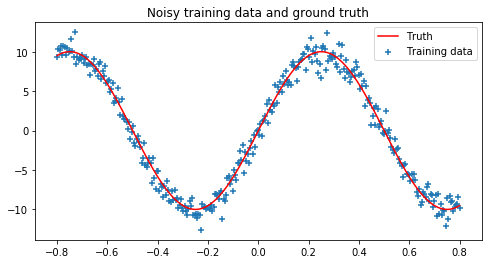

In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x, sigma):
    epsilon = np.random.randn(*x.shape) * sigma
    return 10 * np.sin(2 * np.pi * (x)) + epsilon

train_size = 320
noise = 1.0

plt.figure(figsize=(8,4))
X = np.linspace(-0.8, 0.8, train_size).reshape(-1, 1)
y = f(X, sigma=noise)
y_true = f(X, sigma=0.0)

plt.scatter(X, y, marker='+', label='Training data')
plt.plot(X, y_true, label='Truth', color='r')
plt.title('Noisy training data and ground truth')
plt.legend();

print(X[0],y[0],y_true[0])

In [2]:
from tensorflow.keras import backend as K
from tensorflow.keras import activations, initializers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import callbacks, optimizers
import tensorflow as tf
import tensorflow_probability as tfp

x_in = Input(shape=(1,))
x    = Dense(20, activation='relu')(x_in)
x    = Dense(20, activation='relu')(x)
x    = Dense(1)(x)

model = Model(x_in, x)
model.summary()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
__________________________________

In [0]:
def neg_log_likelihood(y_true, y_pred, sigma=1.0):
    dist = tfp.distributions.Normal(loc=y_pred, scale=sigma)
    return K.sum(-dist.log_prob(y_true))

model.compile(loss=neg_log_likelihood, optimizer=optimizers.Adam(lr=0.01), metrics=['mse'])
model.fit(X, y, batch_size=10, epochs=150, verbose=0);

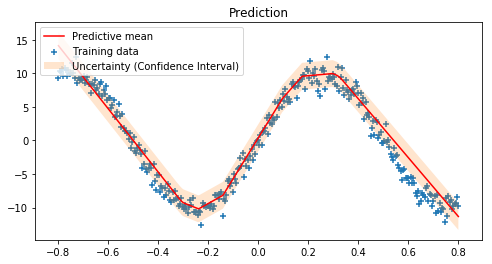

In [4]:
from tqdm import tqdm_notebook

X_test = np.linspace(-0.8, 0.8, 1000).reshape(-1, 1)
y_pred_list = []

y_pred = model.predict(X_test)
    
y_mean = np.mean(y_pred, axis=1)
y_sigma = noise

plt.figure(figsize=(8,4))
plt.plot(X_test, y_mean, 'r-', label='Predictive mean');
plt.scatter(X, y, marker='+', label='Training data')
plt.fill_between(X_test.ravel(), 
                 y_mean + 2 * y_sigma, 
                 y_mean - 2 * y_sigma, 
                 alpha=0.2, label='Uncertainty (Confidence Interval)')
plt.title('Prediction')
plt.legend();

#### Regression with an homoscedastic noise model

This is equivalent to consider the following loss function:

$$
LogLoss = \sum_i \frac{(y_i - f(x_i))^2}{2 \sigma^2(x_i)}+\frac{1}{2} \log \sigma^2(x_i)
$$

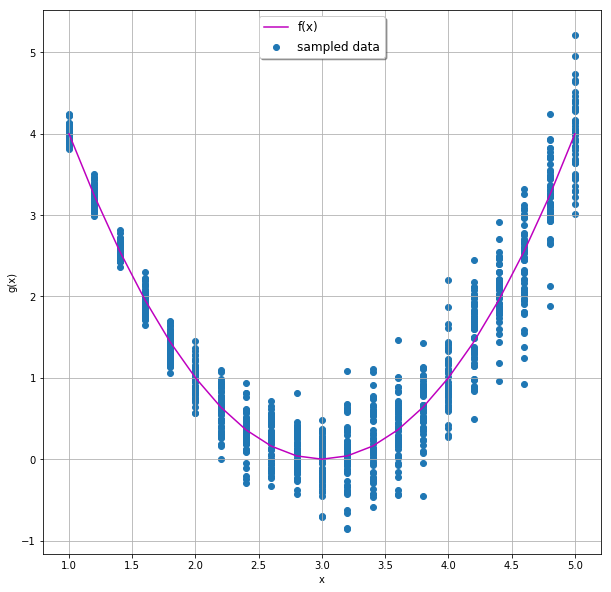

In [5]:
# https://engineering.taboola.com/predicting-probability-distributions/

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
def f(x):
    return x**2-6*x+9

def data_generator(x,sigma_0,samples):
    return np.random.normal(f(x),sigma_0*x,samples)

sigma_0 = 0.1
x_vals = np.arange(1,5.2,0.2)
x_arr = np.array([])
y_arr = np.array([])
samples = 50
for x in x_vals:
    x_arr = np.append(x_arr, np.full(samples,x))
    y_arr = np.append(y_arr, data_generator(x,sigma_0,samples))
x_arr, y_arr = shuffle(x_arr, y_arr)
x_test = np.arange(1.1,5.1,0.2)

fig, ax = plt.subplots(figsize=(10,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('g(x)')
ax.scatter(x_arr,y_arr,label='sampled data')
ax.plot(x_vals,list(map(f,x_vals)),c='m',label='f(x)')
ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
Epoch 0 | cost = 5.5742
Epoch 50 | cost = 1.7065
Epoch 100 | cost = 0.5422
Epoch 150 | cost = 0.1754
Epoch 200 | cost = 0.1384
Epoch 250 | cost = 0.1219
Epoch 300 | cost = 0.1158
Epoch 350 | cost = 0.1100
Epoch 400 | cost = 0.1095
Epoch 450 | cost = 0.1077
Final cost: 0.1101


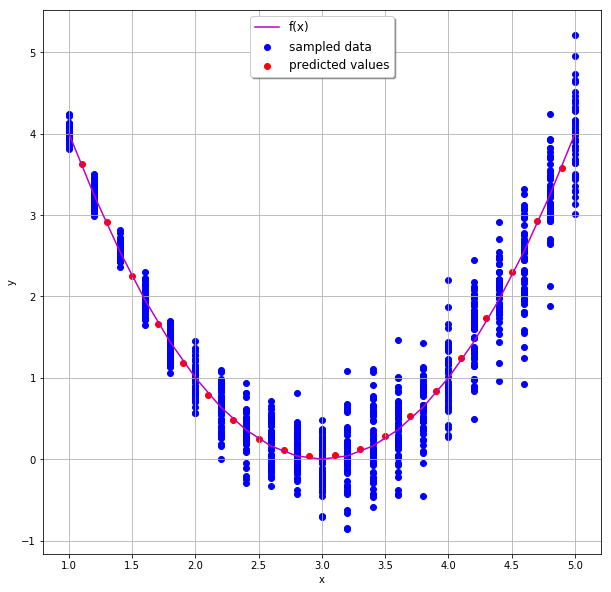

In [6]:
epochs = 500
batch_size = 50
learning_rate = 0.0003
display_step = 50
batch_num = int(len(x_arr) / batch_size)

tf.reset_default_graph()
x = tf.placeholder(name='x',shape=(None,1),dtype=tf.float32)
y = tf.placeholder(name='y',shape=(None,1),dtype=tf.float32)

layer = x
for _ in range(3):
    layer = tf.layers.dense(inputs=layer, units=12, activation=tf.nn.tanh)
output = tf.layers.dense(inputs=layer, units=1)

cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y,predictions=output))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
x_batches = np.array_split(x_arr, batch_num)
y_batches = np.array_split(y_arr, batch_num)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        avg_cost = 0.0
        x_batches, y_batches = shuffle(x_batches, y_batches)
        for i in range(batch_num):
            x_batch = np.expand_dims(x_batches[i],axis=1)
            y_batch = np.expand_dims(y_batches[i],axis=1)
            _, c = sess.run([optimizer,cost], feed_dict={x:x_batch, y:y_batch})
            avg_cost += c/batch_num
        if epoch % display_step == 0:
            print('Epoch {0} | cost = {1:.4f}'.format(epoch,avg_cost))
    y_pred = sess.run(output,feed_dict={x:np.expand_dims(x_test,axis=1)})
    print('Final cost: {0:.4f}'.format(avg_cost))

fig, ax = plt.subplots(figsize=(10,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
ax.scatter(x_arr,y_arr,c='b',label='sampled data')
ax.scatter(x_test,y_pred,c='r',label='predicted values')
ax.plot(x_vals,list(map(f,x_vals)),c='m',label='f(x)')
ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Epoch 0 | cost = 2.5419
Epoch 50 | cost = 1.6657
Epoch 100 | cost = 0.4186
Epoch 150 | cost = 0.2715
Epoch 200 | cost = 0.2184
Epoch 250 | cost = 0.1774
Epoch 300 | cost = 0.1528
Epoch 350 | cost = 0.1351
Epoch 400 | cost = 0.1277
Epoch 450 | cost = 0.1341
Final cost: 0.1197


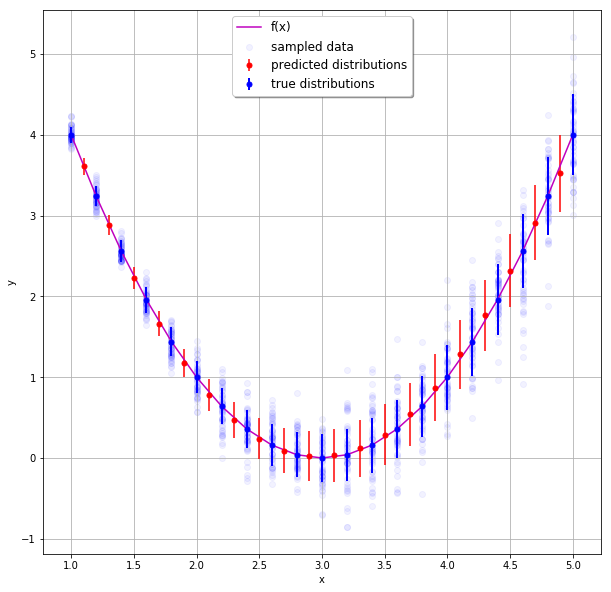

In [7]:
def mdn_cost(mu, sigma, y):
    dist = tf.distributions.Normal(loc=mu, scale=sigma)
    return tf.reduce_mean(-dist.log_prob(y))

epochs = 500
batch_size = 50
learning_rate = 0.0003
display_step = 50
batch_num = int(len(x_arr) / batch_size)

tf.reset_default_graph()
x = tf.placeholder(name='x',shape=(None,1),dtype=tf.float32)
y = tf.placeholder(name='y',shape=(None,1),dtype=tf.float32)

layer = x
for _ in range(3):
    layer = tf.layers.dense(inputs=layer, units=12, activation=tf.nn.tanh)
mu = tf.layers.dense(inputs=layer, units=1)
sigma = tf.layers.dense(inputs=layer, units=1, activation=lambda x: tf.nn.elu(x) + 1)

cost = mdn_cost(mu, sigma, y)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
x_batches = np.array_split(x_arr, batch_num)
y_batches = np.array_split(y_arr, batch_num)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        avg_cost = 0.0
        x_batches, y_batches = shuffle(x_batches, y_batches)
        for i in range(batch_num):
            x_batch = np.expand_dims(x_batches[i],axis=1)
            y_batch = np.expand_dims(y_batches[i],axis=1)
            _, c = sess.run([optimizer,cost], feed_dict={x:x_batch, y:y_batch})
            avg_cost += c/batch_num
        if epoch % display_step == 0:
            print('Epoch {0} | cost = {1:.4f}'.format(epoch,avg_cost))
    mu_pred, sigma_pred = sess.run([mu,sigma],feed_dict={x:np.expand_dims(x_test,axis=1)})
    print('Final cost: {0:.4f}'.format(avg_cost))

fig, ax = plt.subplots(figsize=(10,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
ax.errorbar(x_test,mu_pred,yerr=np.absolute(sigma_pred),c='r',ls='None',marker='.',ms=10,label='predicted distributions')
ax.scatter(x_arr,y_arr,c='b',alpha=0.05,label='sampled data')
ax.errorbar(x_vals,list(map(f,x_vals)),yerr=list(map(lambda x: sigma_0*x,x_vals)),c='b',lw=2,ls='None',marker='.',ms=10,label='true distributions')
ax.plot(x_vals,list(map(f,x_vals)),c='m',label='f(x)')
ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()


## Epistemic and Total Uncertainty

##### Copyright 2019 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License"); { display-mode: "form" }
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TFP Probabilistic Layers: Regression

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Probabilistic_Layers_Regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Probabilistic_Layers_Regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this example we show how to fit regression models using TFP's "probabilistic layers."

### Dependencies & Prerequisites


In [0]:
#@title Install { display-mode: "form" }
TF_Installation = 'TF2 Nightly (GPU)' #@param ['TF2 Nightly (GPU)', 'TF2 Stable (GPU)', 'TF1 Nightly (GPU)', 'TF1 Stable (GPU)','System']

if TF_Installation == 'TF2 Nightly (GPU)':
  !pip install -q --upgrade tf-nightly-gpu-2.0-preview
  print('Installation of `tf-nightly-gpu-2.0-preview` complete.')
elif TF_Installation == 'TF2 Stable (GPU)':
  !pip install -q --upgrade tensorflow-gpu==2.0.0-alpha0
  print('Installation of `tensorflow-gpu==2.0.0-alpha0` complete.')
elif TF_Installation == 'TF1 Nightly (GPU)':
  !pip install -q --upgrade tf-nightly-gpu
  print('Installation of `tf-nightly-gpu` complete.')
elif TF_Installation == 'TF1 Stable (GPU)':
  !pip install -q --upgrade tensorflow-gpu
  print('Installation of `tensorflow-gpu` complete.')
elif TF_Installation == 'System':
  pass
else:
  raise ValueError('Selection Error: Please select a valid '
                   'installation option.')

Installation of `tf-nightly-gpu-2.0-preview` complete.


In [0]:
#@title Install { display-mode: "form" }
TFP_Installation = "Nightly" #@param ["Nightly", "Stable", "System"]

if TFP_Installation == "Nightly":
  !pip install -q tfp-nightly
  print("Installation of `tfp-nightly` complete.")
elif TFP_Installation == "Stable":
  !pip install -q --upgrade tensorflow-probability
  print("Installation of `tensorflow-probability` complete.")
elif TFP_Installation == "System":
  pass
else:
  raise ValueError("Selection Error: Please select a valid "
                   "installation option.")

Installation of `tfp-nightly` complete.


In [0]:
#@title Import { display-mode: "form" }

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.python import tf2
if not tf2.enabled():
  import tensorflow.compat.v2 as tf
  tf.enable_v2_behavior()
  assert tf2.enabled()

import tensorflow_probability as tfp

sns.reset_defaults()
#sns.set_style('whitegrid')
#sns.set_context('talk')
sns.set_context(context='talk',font_scale=0.7)

%matplotlib inline

tfd = tfp.distributions

### Make things Fast!

Before we dive in, let's make sure we're using a GPU for this demo.  

To do this, select "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU".

The following snippet will verify that we have access to a GPU.

In [0]:
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

SUCCESS: Found GPU: /device:GPU:0


Note: if for some reason you cannot access a GPU, this colab will still work. (Training will just take longer.)

## Motivation

Wouldn't it be great if we could use TFP to specify a probabilistic model then simply minimize the negative log-likelihood, i.e.,

In [0]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)

Well not only is it possible, but this colab shows how! (In context of linear regression problems.)

In [0]:
#@title Synthesize dataset.
w0 = 0.125
b0 = 5.
x_range = [-20, 60]

def load_dataset(n=150, n_tst=150):
  np.random.seed(43)
  def s(x):
    g = (x - x_range[0]) / (x_range[1] - x_range[0])
    return 3 * (0.25 + g**2.)
  x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
  eps = np.random.randn(n) * s(x)
  y = (w0 * x * (1. + np.sin(x)) + b0) + eps
  x = x[..., np.newaxis]
  x_tst = np.linspace(*x_range, num=n_tst).astype(np.float32)
  x_tst = x_tst[..., np.newaxis]
  return y, x, x_tst

y, x, x_tst = load_dataset()

### Case 1: No Uncertainty

In [0]:
# Build model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False);

# Profit.
[print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

0.13275796
5.1289654


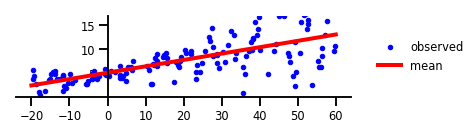

In [0]:
#@title Figure 1: No uncertainty.
w = np.squeeze(model.layers[-2].kernel.numpy())
b = np.squeeze(model.layers[-2].bias.numpy())

plt.figure(figsize=[6, 1.5])  # inches
#plt.figure(figsize=[8, 5])  # inches
plt.plot(x, y, 'b.', label='observed');
plt.plot(x_tst, yhat.mean(),'r', label='mean', linewidth=4);
plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig1.png', bbox_inches='tight', dpi=300)

### Case 2: Aleatoric Uncertainty

In [0]:
# Build model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1 + 1),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[...,1:]))),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False);

# Profit.
[print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

[0.13226233 0.41329   ]
[5.1153    1.2915019]


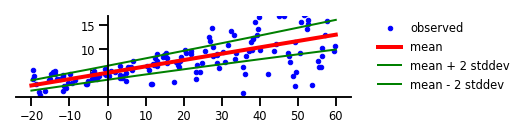

In [0]:
#@title Figure 2: Aleatoric Uncertainty
plt.figure(figsize=[6, 1.5])  # inches
plt.plot(x, y, 'b.', label='observed');

m = yhat.mean()
s = yhat.stddev()

plt.plot(x_tst, m, 'r', linewidth=4, label='mean');
plt.plot(x_tst, m + 2 * s, 'g', linewidth=2, label=r'mean + 2 stddev');
plt.plot(x_tst, m - 2 * s, 'g', linewidth=2, label=r'mean - 2 stddev');

plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig2.png', bbox_inches='tight', dpi=300)

### Case 3: Epistemic Uncertainty

In [0]:
# Specify the surrogate posterior over `keras.layers.Dense` `kernel` and `bias`.
def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
  n = kernel_size + bias_size
  c = np.log(np.expm1(1.))
  return tf.keras.Sequential([
      tfp.layers.VariableLayer(2 * n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t[..., :n],
                     scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
          reinterpreted_batch_ndims=1)),
  ])

In [0]:
# Specify the surrogate posterior over `keras.layers.Dense` `kernel` and `bias`.
def prior_trainable(kernel_size, bias_size=0, dtype=None):
  n = kernel_size + bias_size
  return tf.keras.Sequential([
      tfp.layers.VariableLayer(n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t, scale=1),
          reinterpreted_batch_ndims=1)),
  ])

In [0]:
# Build model.
model = tf.keras.Sequential([
  tfp.layers.DenseVariational(1, posterior_mean_field, prior_trainable),
  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False);

# Profit.
[print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

[ 0.1374202  5.1056857 -3.7132006 -0.5256554]
[0.1592448 5.12206  ]


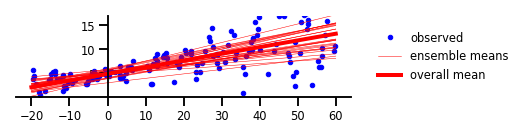

In [0]:
#@title Figure 3: Epistemic Uncertainty
plt.figure(figsize=[6, 1.5])  # inches
plt.clf();
plt.plot(x, y, 'b.', label='observed');

yhats = [model(x_tst) for _ in range(100)]
avgm = np.zeros_like(x_tst[..., 0])
for i, yhat in enumerate(yhats):
  m = np.squeeze(yhat.mean())
  s = np.squeeze(yhat.stddev())
  if i < 25:
    plt.plot(x_tst, m, 'r', label='ensemble means' if i == 0 else None, linewidth=0.5)
  avgm += m
plt.plot(x_tst, avgm/len(yhats), 'r', label='overall mean', linewidth=4)

plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig3.png', bbox_inches='tight', dpi=300)

### Case 4: Aleatoric & Epistemic Uncertainty

In [0]:
# Build model.
model = tf.keras.Sequential([
  tfp.layers.DenseVariational(1 + 1, posterior_mean_field, prior_trainable),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.01 * t[...,1:]))),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False);

# Profit.
[print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

[ 0.13091448  2.8183267   5.1185093   2.954348   -3.344546   -0.684905
 -0.5135757   0.05770317]
[0.13267924 2.7312424  5.191225   2.9794762 ]


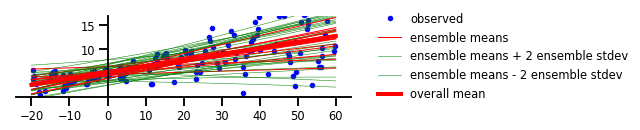

In [0]:
#@title Figure 4: Both Aleatoric & Epistemic Uncertainty
plt.figure(figsize=[6, 1.5])  # inches
plt.plot(x, y, 'b.', label='observed');

yhats = [model(x_tst) for _ in range(100)]
avgm = np.zeros_like(x_tst[..., 0])
for i, yhat in enumerate(yhats):
  m = np.squeeze(yhat.mean())
  s = np.squeeze(yhat.stddev())
  if i < 15:
    plt.plot(x_tst, m, 'r', label='ensemble means' if i == 0 else None, linewidth=1.)
    plt.plot(x_tst, m + 2 * s, 'g', linewidth=0.5, label='ensemble means + 2 ensemble stdev' if i == 0 else None);
    plt.plot(x_tst, m - 2 * s, 'g', linewidth=0.5, label='ensemble means - 2 ensemble stdev' if i == 0 else None);
  avgm += m
plt.plot(x_tst, avgm/len(yhats), 'r', label='overall mean', linewidth=4)

plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig4.png', bbox_inches='tight', dpi=300)